In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf

**1. Assume the 'robberies.csv' dataset from Brownlee Chapter 30:**

In [2]:
robb_df = pd.read_csv("monthly-robberies.csv", header=0, index_col=0)

**(a) Perform a Dickey-Fuller test on the series.  Is the series stationary?**

In [3]:
result = adfuller(robb_df.values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for k, v in result[4].items():
    print('\t%s: %.3f' % (k,v))

ADF Statistic: 1.001102
p-value: 0.994278
Critical Values:
	1%: -3.494
	5%: -2.889
	10%: -2.582


After performing the Dickey-Fuller test on the series, the p-value of the series is greater than 0.05. Hence, the series in **not stationary.**

**(b) Detrend the series with a polynomial fit (up to order 3)**

In [4]:
def detrend_series(data, n):
    x = [i for i in range(0, len(data))]
    y = data.values
    coeff = np.polyfit(x, y, n)
    yhat = list()
    for i in range(0, len(robb_df)):
        values = 0
        for j in range(n+1):
            values += coeff[j]*i**(n-j)
        yhat.append(values)
    
    detrended = [y[i]-yhat[i] for i in range(0, len(data))]
    fig, (ax1, ax2, ax3) = plt.subplots(1,3)
    
    fig.suptitle(str(n) + ' Order Polynomial')
    
    fig.set_figheight(5)
    fig.set_figwidth(20)
    ax1.plot(y)
    ax1.plot(yhat)
    
    ax2.plot(detrended)
    
    result = adfuller(detrended)
    
    ax3.set_axis_off()
    ax3.text(0.1, 0.6, 'ADF Statistic: %f' % result[0], fontsize=15)
    ax3.text(0.1, 0.5, 'p-value: %f' % result[1], fontsize=15)

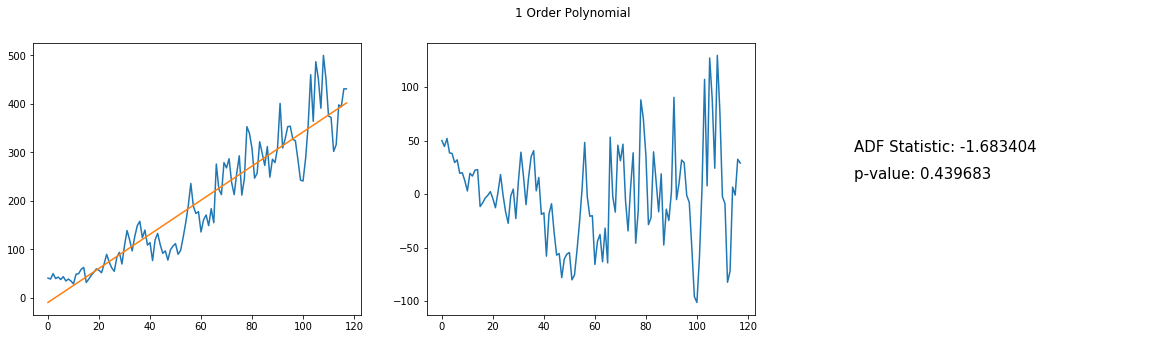

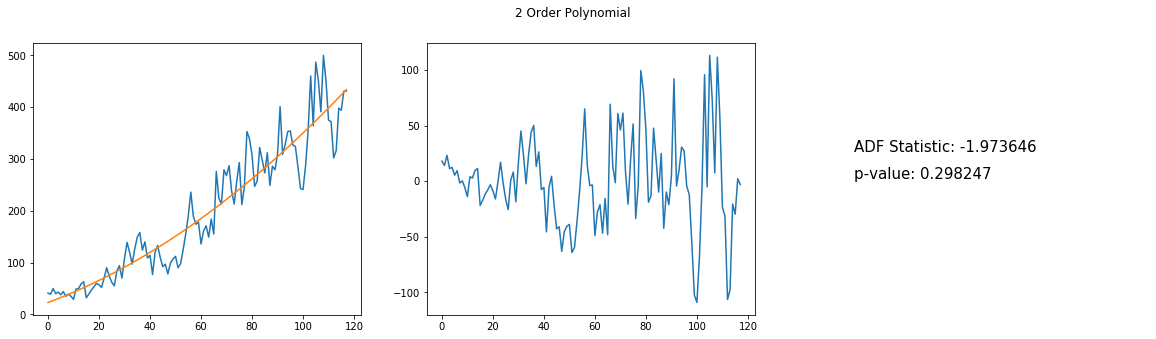

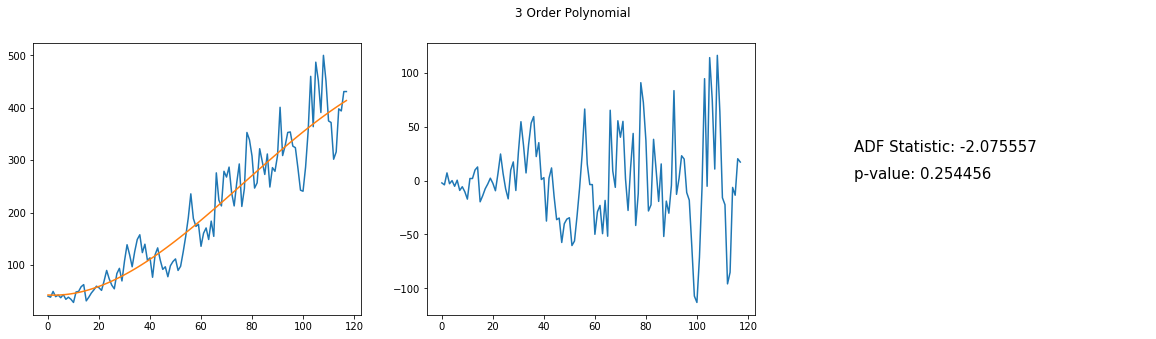

In [5]:
detrend_series(robb_df, 1)
detrend_series(robb_df, 2)
detrend_series(robb_df, 3)

**(c) At what polynomial order does the detrended series become stationary?**

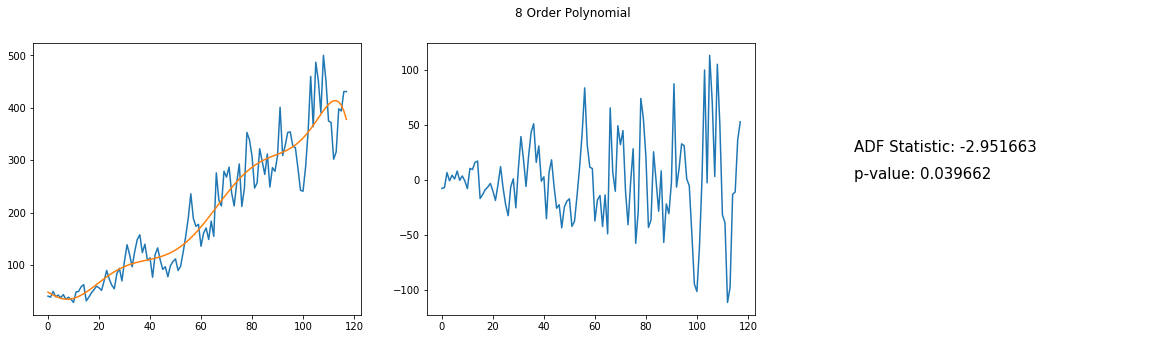

In [6]:
#detrend_series(robb_df, 4)
#detrend_series(robb_df, 5)
#detrend_series(robb_df, 6)
#detrend_series(robb_df, 7)
detrend_series(robb_df, 8)

At 8th polynomial order, the detrended series becomes stationary.

**(d) Perform differencing on the original series to induce stationarity**

In [7]:
X = robb_df.values
diff = list()
for i in range(1, len(X)):
    values = X[i] - X[i-1]
    diff.append(values)

result = adfuller(diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for k, v in result[4].items():
    print('\t%s: %.3f' % (k,v))

ADF Statistic: -7.428564
p-value: 0.000000
Critical Values:
	1%: -3.494
	5%: -2.889
	10%: -2.582


**(e) At what order of differencing does the series become stationary?**

At first order of differening, the series becomes Stationarity.

**2. Assume the 'champagne.csv' dataset from Brownlee Chapter 32:**

In [8]:
cham_df = pd.read_csv("monthly_champagne_sales.csv", header=0, index_col=0, parse_dates=True, squeeze=True)

**(a) Perform a Dickey-Fuller test on the series.  Is the series stationary?**

In [9]:
result = adfuller(cham_df.values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for k, v in result[4].items():
    print('\t%s: %.3f' % (k,v))

ADF Statistic: -1.833593
p-value: 0.363916
Critical Values:
	1%: -3.503
	5%: -2.893
	10%: -2.584


After performing the Dickey-Fuller test on the series, the p-value of the series is greater than 0.05. Hence, the series in **not stationary.**

**(b) Perform seasonal differencing to eliminate seasonality**

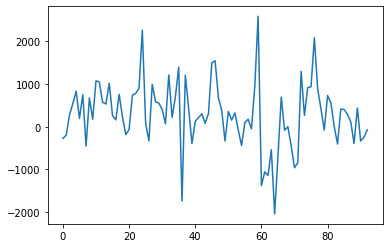

In [10]:
X = cham_df.values
diff = list()
months_in_year = 12

for i in range(months_in_year, len(X)):
    month_str = str(cham_df.index[i].year-1)+'-'+str(cham_df.index[i].month)
    month_mean_last_year = cham_df[month_str]
    value = X[i] - month_mean_last_year
    diff.append(value)

plt.plot(diff)

**(c) Is the resulting series stationary?**

In [11]:
result = adfuller(diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for k, v in result[4].items():
    print('\t%s: %.3f' % (k,v))

ADF Statistic: -7.626619
p-value: 0.000000
Critical Values:
	1%: -3.504
	5%: -2.894
	10%: -2.584


Yes, the resulting series is stationary.

**(d) Perform a seasonal decomposition on the original series and plot the results**

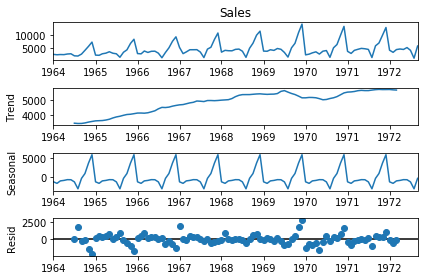

In [12]:
result = seasonal_decompose(cham_df, model='additive', period=12)
result.plot()
plt.show()

**(e) Plot a 1 year period (Jan-Dec) for only the seasonal component**

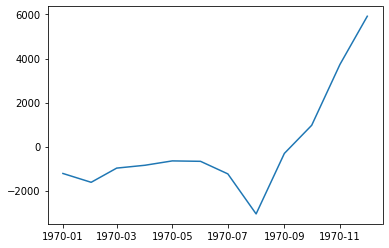

In [13]:
plt.plot(result.seasonal[result.seasonal.index.year == 1970])
plt.show()

**3. Assume the 'series.csv' dataset:**

In [14]:
df = pd.read_csv('series.csv', header=0, index_col=0)

**(a) Using ACF & PACF plots, estimate the ARMA(p,q) order**

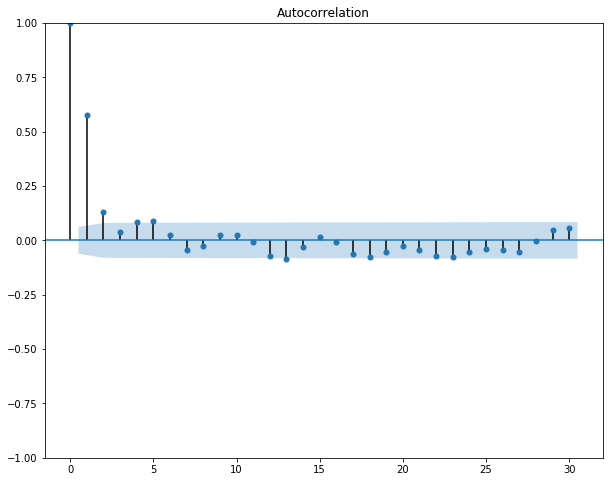

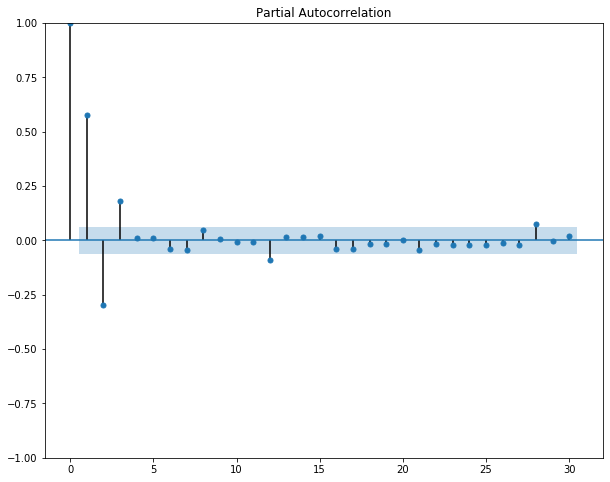

In [20]:
plt.rcParams['figure.figsize'] = (10,8)
plot_acf(df)
plot_pacf(df, method='ywm')
plt.show()

From the ACF and PACF plots, the estimate ARMA(p, q) order is ARMA(3, 2)

**(b) Going with your answer for p, calculate the a1 - ap coefficients using the Yule-Walker equations**

In [16]:
p1 = acf(df)[1]
p2 = acf(df)[2]
p3 = acf(df)[3]

matrix = np.array([1, p1, p2, p1, 1, p1, p2, p1, 1]).reshape(3,3)
matrix1 = np.array([p1, p1, p2, p2, 1, p1, p3, p1, 1]).reshape(3,3)
matrix2 = np.array([1, p1, p2, p1, p2, p1, p2, p3, 1]).reshape(3,3)
matrix3 = np.array([1, p1, p1, p1, 1, p2, p2, p1, p3]).reshape(3,3)

a1 = np.linalg.det(matrix1) / np.linalg.det(matrix)
a2 = np.linalg.det(matrix2) / np.linalg.det(matrix)
a3 = np.linalg.det(matrix3) / np.linalg.det(matrix)

print('a1: %f' % a1)
print('a2: %f' % a2)
print('a3: %f' % a3)

a1: 0.798297
a2: -0.430456
a3: 0.181301


**4. The sunspot cycle is estimated at 11 years.  Based on the ACF of the "Monthly Sunspots" dataset. what is the sunspot cycle to the nearest month?**

In [17]:
sun_df = pd.read_csv("monthly-sunspots.csv", header=0, index_col=0)

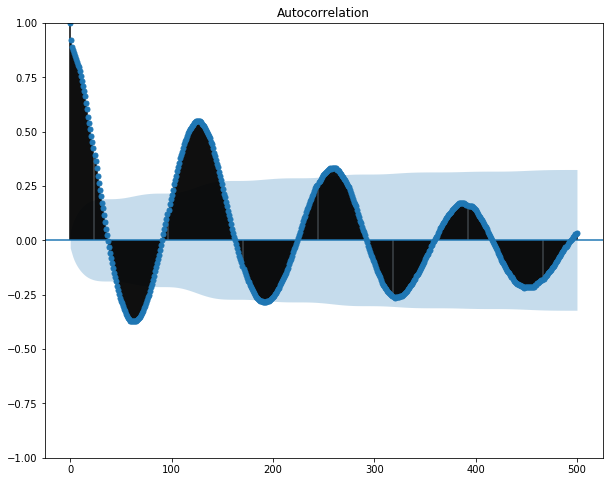

In [23]:
plot_acf(sun_df, lags = 500)
plt.show()

In [36]:
acf_values = acf(sun_df, nlags=500)
f = np.where(acf_values < 0)[0][0]
next_max = acf_values[f:].argmax()
(next_max + f) / 12

10.416666666666666

The sunspot cycle to the nearest month is 10 years and 5 months.